In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head(30)

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
5,1,33,173
6,1,64,1965
7,1,99,1993
8,1,45,278
9,0,96,12479


In [3]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()


,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
dados.sample(20)

,nao_finalizado,horas_esperadas,preco
1736,0,51,1058
1897,1,1,204
416,1,41,251
405,0,18,131
857,1,4,184
603,1,14,147
183,0,70,2180
2077,0,95,21209
1500,0,35,378
2015,0,64,2799


In [5]:
troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [6]:
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


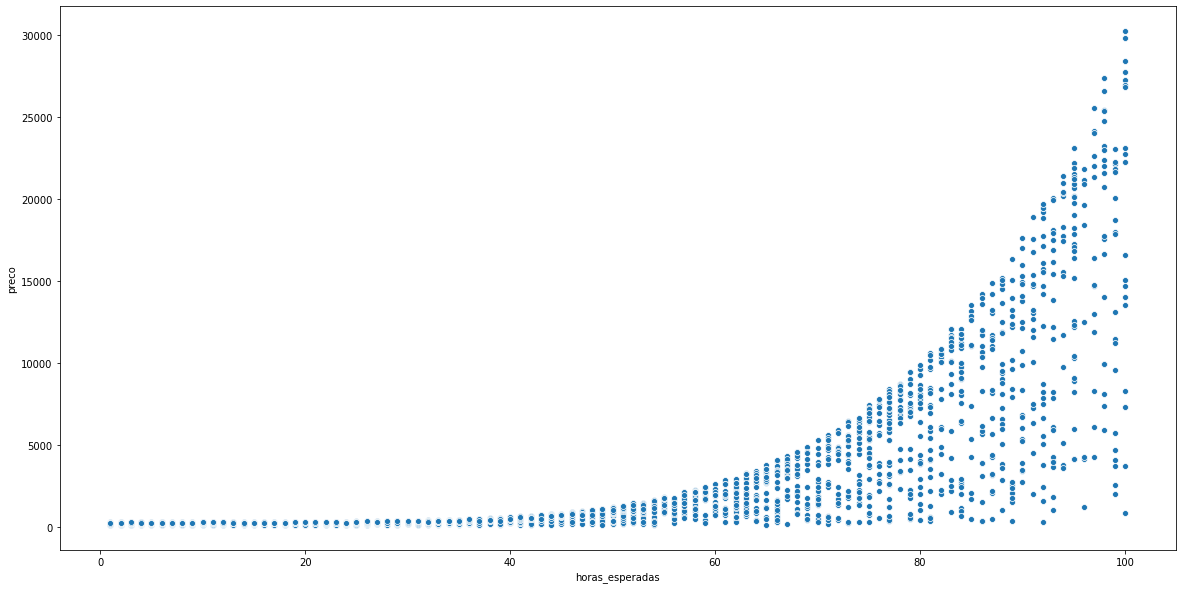

In [7]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

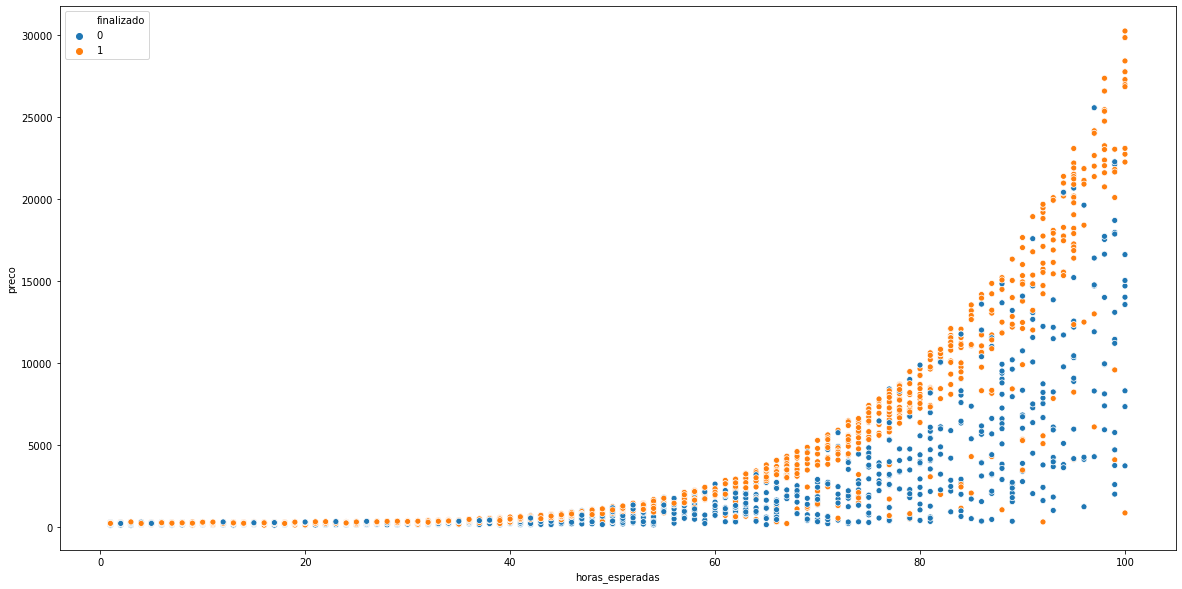

In [8]:
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

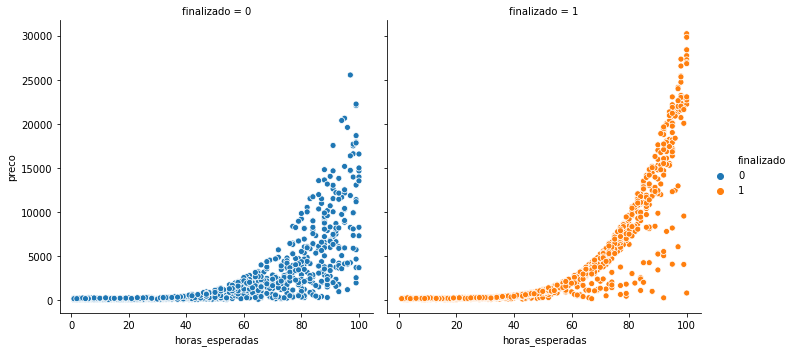

In [9]:
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)

In [10]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 49.26%


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [12]:
import numpy as np
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print("A acurácia do algoritmo de baseline foi %.2f%%" % acuracia)

A acurácia do algoritmo de baseline foi 52.59%


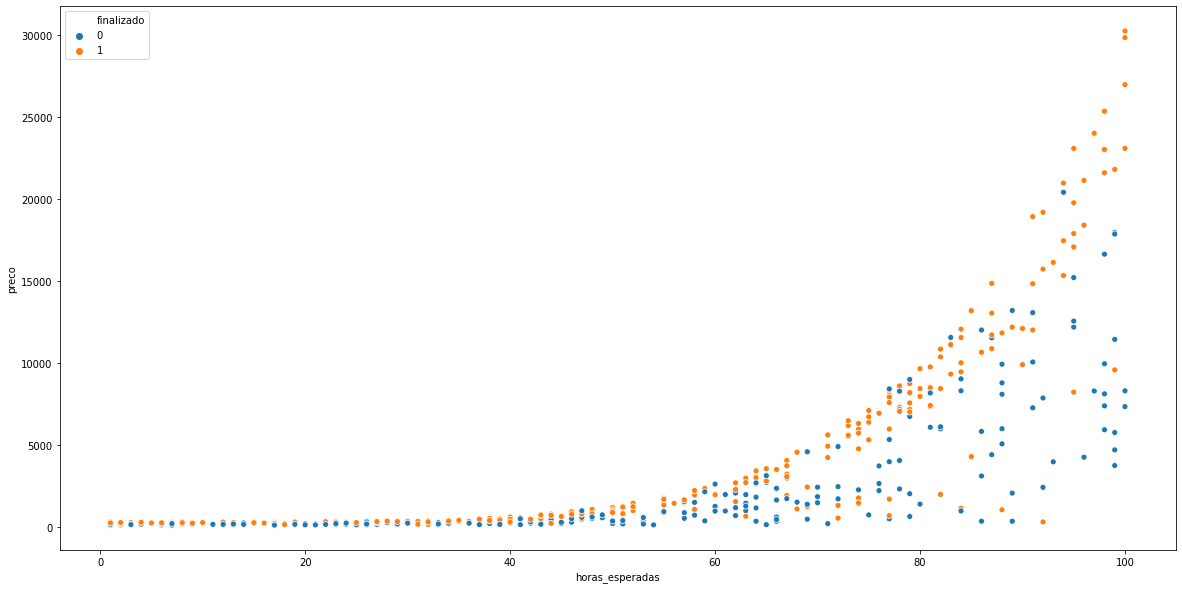

In [13]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x)

In [14]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max,y_min,y_max)

1 100 100 30223


In [15]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [16]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [17]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

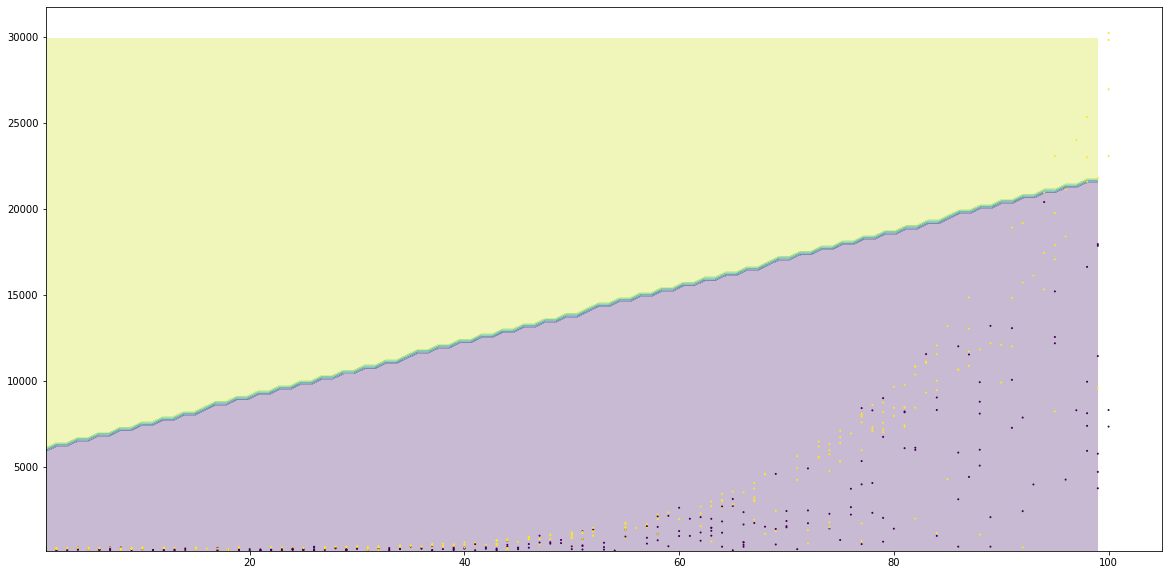

In [18]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

# DECISION BOUNDARY

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 55.19%


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


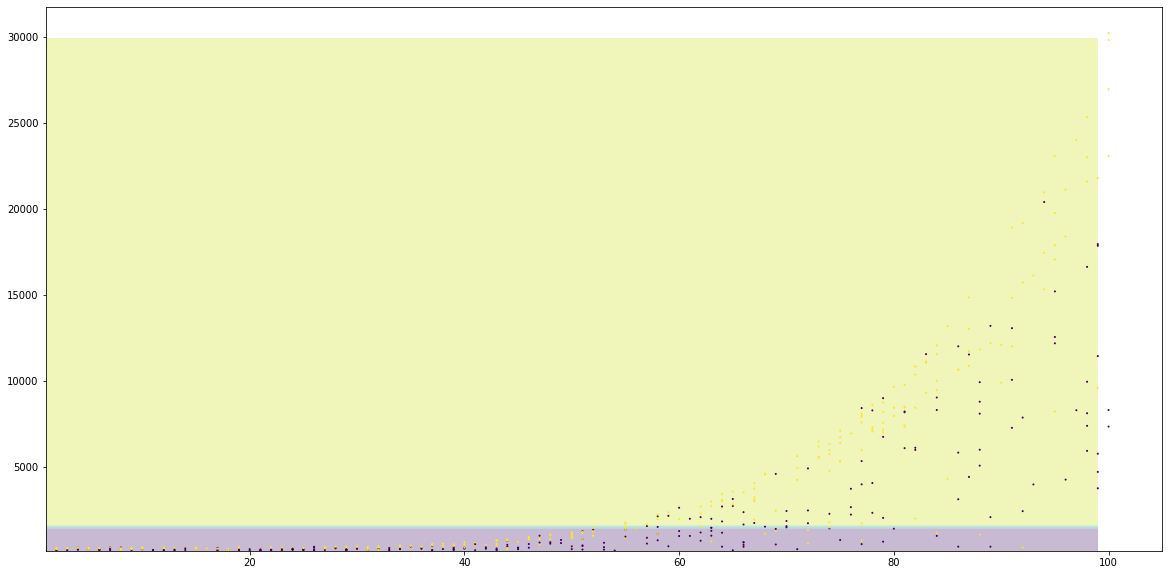

In [20]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

# DECISION BOUNDARY

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


In [22]:
treino_x

array([[-1.20810685, -0.58850785],
       [-0.25992095, -0.48069545],
       [ 1.46086087,  0.13548927],
       ...,
       [-0.57598292, -0.58492075],
       [ 1.21503489,  0.45294796],
       [ 1.1799169 ,  1.18670998]])

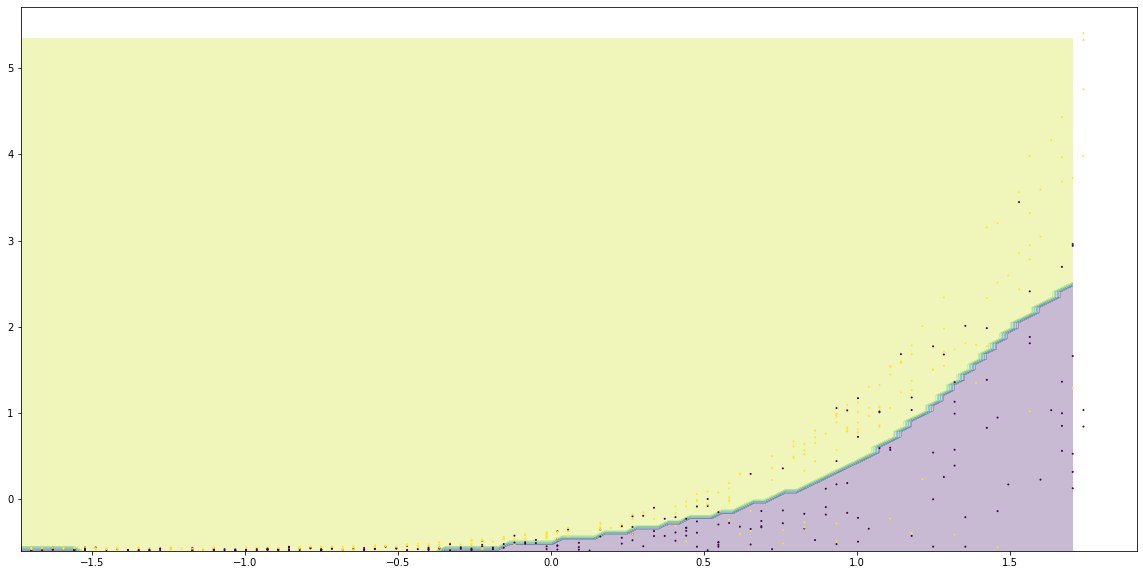

In [23]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)

# DECISION BOUNDARY

# Tentando Refazer com Deep Learning

In [1]:
import seaborn as sns
import numpy as np
import tensorflow
import pandas as pd
from tensorflow import keras

In [2]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.sample(5)

,unfinished,expected_hours,price
188,1,94,9752
875,1,52,243
120,1,13,171
966,1,24,199
604,1,20,103


In [3]:
dados['finalizado'] = 1 - dados['unfinished']

In [4]:
del dados['unfinished']

In [5]:
dados['horas_esperadas'] = dados['expected_hours']
dados['preco'] = dados['price']
del dados['price'], dados['expected_hours']

In [6]:
# dados.sample(5)
dados.shape

(2157, 3)

In [7]:
treino_raw = dados[:1726]
treino_y = treino_raw['finalizado']
treino_x = treino_raw.drop(['finalizado'], axis = 1)

teste_raw = dados[:1726]
teste_y = teste_raw['finalizado']
teste_x = teste_raw.drop(['finalizado'], axis = 1)

## Machine Learning Clássico

In [8]:
# Árvore de decisão
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [9]:
x = dados.drop(['finalizado'], axis = 1)
y = dados['finalizado']

sktreino_x, skteste_x, sktreino_y, skteste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)

In [10]:
SEED = 12123
np.random.seed(SEED)

modelo = DecisionTreeClassifier()
modelo.fit(sktreino_x, sktreino_y)
previsoes = modelo.predict(skteste_x)
acuracia = accuracy_score(skteste_y, previsoes) * 100

In [11]:
print(f'A acurácia do nosso teste foi de: {acuracia}%')

A acurácia do nosso teste foi de: 74.81481481481481%


## Hora do show! (Deep Learning)

In [12]:
treino_x.max()

horas_esperadas      100
preco              30223
dtype: int64

In [13]:
treino_x['preco'] = sktreino_x['preco']/ 30223.0
treino_x['horas_esperadas'] = sktreino_x['horas_esperadas'] / 100.0

modelo = keras.Sequential([
    keras.layers.Dense(512, activation = tensorflow.nn.relu),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dense(128, activation = tensorflow.nn.relu),
    keras.layers.Dense(64, activation = tensorflow.nn.relu),
    keras.layers.Dense(32, activation = tensorflow.nn.relu),
    keras.layers.Dense(16, activation = tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2, activation = tensorflow.nn.softmax)
])

modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

modelo.fit(treino_x, treino_y, epochs=4)

Epoch 1/4
54/54 [==============================] - 1s 11ms/step - loss: nan - accuracy: 0.5504
Epoch 2/4
54/54 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.5550
Epoch 3/4
54/54 [==============================] - 1s 11ms/step - loss: nan - accuracy: 0.5550
Epoch 4/4
54/54 [==============================] - 1s 11ms/step - loss: nan - accuracy: 0.5550


In [17]:
predicoes = modelo.predict(treino_x)
perda_teste, acuracia_teste = modelo.evaluate(treino_x, treino_y)
print(f'A perda do teste: {perda_teste:.2f} e a acurácia foi de: {acuracia_teste * 100:.2f}%')

54/54 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.5550
A perda do teste: nan e a acurácia foi de: 55.50%


In [15]:
for i in range(0):
  print(f'Resultado do teste: {np.argmax(predicoes[i])} e Gabarito: {teste_y[i]}')

It's better using the DecisionTree than the DeepLearning classics in this case...